## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
#as the timestamp is of type string we will convert it to datetime 
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
#check the conversion to datetime is done 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


b. Use the below cell to find the number of rows in the dataset.

In [7]:
#get the number of rows by using shape method
noOfRows = df.shape[0]
noOfRows

294478

c. The number of unique users in the dataset.

In [8]:
#we will use nunique method to get the unique Ids
noOfUniqueUsers = df.user_id.nunique()
noOfUniqueUsers

290584

d. The proportion of users converted.

In [9]:
#we will query the data using converted = 1  
noOfUsersConverted = df.query("converted==1").user_id.nunique()
propOfUsersConverted = noOfUsersConverted/noOfUniqueUsers
propOfUsersConverted

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
#here we will query the rows which have old page as a landing page and belong to the treatment group  
noOfRows_treatment_Without_newpage = df.query("group=='treatment' and landing_page=='old_page'")
noOfRows_control_Without_oldpage = df.query("group=='control' and landing_page=='new_page'")
Total_Rows_misaligned = noOfRows_treatment_Without_newpage.shape[0]+noOfRows_control_Without_oldpage.shape[0]
Total_Rows_misaligned

3893

f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


**so it seems that None of the rows has any missing info** 

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [12]:
#here we are concatenating the three dataframes and then removing all duplicates to produce df2
df2 = pd.concat([df, noOfRows_treatment_Without_newpage, noOfRows_control_Without_oldpage]).drop_duplicates(keep=False)


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       290585 non-null  int64         
 1   timestamp     290585 non-null  datetime64[ns]
 2   group         290585 non-null  object        
 3   landing_page  290585 non-null  object        
 4   converted     290585 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.3+ MB


In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
uniqueUsers_df2 = df2.user_id.nunique()
uniqueUsers_df2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:

# Select all duplicate rows based on one column which is user_id
duplicateUsers = df2[df2.duplicated(['user_id'])]
duplicateUsers.user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [17]:
duplicateUsers

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
#we will user drop_duplicates method with a subset parameter to include only user_id column to delete the non-unique user
df2 = df2.drop_duplicates(subset='user_id', keep='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
propOfUsers_convert = df2.query ("converted==1")['user_id'].count()/290584
propOfUsers_convert

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

**we will use Bayes rule to solve these kind of probabilities**

Bayes rule ststes that :

$$P(A|B)= \frac{P(B|A) * P(A)}{P(B)}$$

So we want to calculate p(converted | control ) and let us denote it with P1

p(converted)=propOfUsers_convert

In [20]:
propOfUsers_control  = df2.query ("group=='control'")['user_id'].count()/290584
propOfUsers_control

0.4999380557773312

In [21]:
Users_convertedDataFarme = df2.query ("converted==1")
Users_convertedDataFarme_Count = Users_convertedDataFarme.user_id.count()

In [22]:
Users_control_whoAreConverted = Users_convertedDataFarme.query("group=='control'")['user_id'].count()
Users_control_whoAreConverted

17489

In [23]:
propOfUsers_control_whoAreAlreadyConverted = Users_control_whoAreConverted / Users_convertedDataFarme_Count
propOfUsers_control_whoAreAlreadyConverted

0.5032371306074296

In [24]:
P1 = (propOfUsers_control_whoAreAlreadyConverted*propOfUsers_convert)/propOfUsers_control
P1

0.12038630450046119

c. Given that an individual was in the `treatment` group, what is the probability they converted?

So we want to calculate p(converted | treatment ) and let us denote it with P2

In [25]:
propOfUsersTreatment = 1-propOfUsers_control
propOfUsersTreatment

0.5000619442226688

In [26]:
Users_treatment_whoAreConverted = Users_convertedDataFarme.query("group=='treatment'")['user_id'].count()
Users_treatment_whoAreConverted

17264

In [27]:
propOfUsers_treatment_whoAreAlreadyConverted = Users_treatment_whoAreConverted / Users_convertedDataFarme_Count
propOfUsers_treatment_whoAreAlreadyConverted

0.4967628693925704

In [28]:
P2 = (propOfUsers_treatment_whoAreAlreadyConverted*propOfUsers_convert)/propOfUsersTreatment
P2

0.11880806551510563

d. What is the probability that an individual received the new page?

In [29]:
propNewPage = df2.query ("landing_page=='new_page'")['user_id'].count()/df2.user_id.count()
propNewPage

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

No , from the results above there is no sufficent evidence as the propability of conversion for the treatment group is less than the control group 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

* *Null hypothesis :*

**$p_{old} - p_{new} >= 0$**

* *Alternative hypothesis :*

**$p_{old} - p_{new} < 0$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [30]:
#get the converted rate 
Pnew = df2.query("converted==1")['user_id'].count()/290584
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [31]:
#under the null hypothesis the Pold equals Pnew
Pold = Pnew
Pold

0.11959708724499628

c. What is $n_{new}$?

In [32]:
#no of users who get landing page the new page 
N_new = df2.query("landing_page=='new_page'")['user_id'].count()
N_new

145310

d. What is $n_{old}$?

In [33]:
#no of users who get landing page the old page 
N_old = df2.query("landing_page=='old_page'")['user_id'].count()
N_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [34]:
#we will use numpy.random.choice method to stimulate these transactions 
new_page_converted = np.random.choice([1,0],N_new, p=(Pnew,1-Pnew))
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [35]:
old_page_converted = np.random.choice([1,0],N_old, p=(Pold,1-Pold))
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [36]:
#we will get the mean of both arrays and subtract them
new_page_converted.mean() - old_page_converted.mean()

-0.00016750124930571542

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [37]:
p_diffs = []
for x in range (10000):
    new_page_converted_Sample = np.random.choice([1,0],N_new, p=[Pnew,(1-Pnew)])
    old_page_converted_sample = np.random.choice([1,0],N_old, p=[Pold,(1-Pold)])
    difAvg =new_page_converted_Sample.mean() - old_page_converted_sample.mean()
    p_diffs.append(difAvg)
    

In [38]:
#convert p_diffs to  numpy array 
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  19.,  117.,  646., 1778., 2799., 2566., 1478.,  474.,  112.,
          11.]),
 array([-0.00437941, -0.00348329, -0.00258717, -0.00169105, -0.00079492,
         0.0001012 ,  0.00099732,  0.00189344,  0.00278956,  0.00368568,
         0.00458181]),
 <a list of 10 Patch objects>)

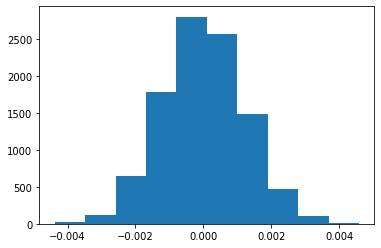

In [40]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

First we will create the normal distribution of the null hypothesis .

In [47]:
#The observed difference 
obs = P2 - P1
obs

-0.0015782389853555567

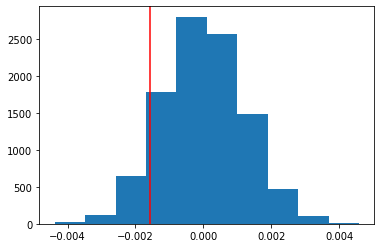

In [48]:
#plot the null hypothesis distribution and determine the line of the observed 
plt.hist(p_diffs)
plt.axvline(x=obs,color ='red')

In [51]:
#we can compute the p value as follow 
p_value = (p_diffs > obs).mean()
p_value


0.907

**The P-value is higher than alpha value which is was equal 5%...
Therfore we fail to reject the null hypothesis**.

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This value is called the p-value :** 


***'It is The probability of observing our statistic or a more extreme statistic from the null hypothesis in favor of the alternative hypothesis.'***

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [52]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page' and converted==1")['user_id'].count()
convert_new = df2.query("landing_page=='new_page' and converted==1")['user_id'].count()
n_old = df2.query("landing_page=='old_page'")['user_id'].count()
n_new = df2.query("landing_page=='new_page'")['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [53]:
Zscore, Pvalue = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
Zscore, Pvalue

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The P-value is the same as we computed before .**

**The z score -1.31 means that our score is far away below from the average by a value equals  (1.31  standered deviation) .**

**Since our alpha is 5% , then the associated z score with this alpha is 1.96**

**As our z score is less than 1.96 , therfore we fail to reject the null hypothesis , and this result is aligned with the calculated results before.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will use logistic regression , since the response in this case is a categorical variable represented by 0 for non-cenversion and 1 for conversion , and not a quantitative variable.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [57]:
#first we will add an intercept column 
df2['intercept'] = 1

* we will add dummy variables for the group column because so that we can represent it in our model , however we will not add a dummy variable for the landing page column because it is totally dependent on the group column 

In [58]:
#adding dummy variable 
ab_page = pd.get_dummies(df2['group'])
df2_new = df2.join(ab_page)

In [59]:
#check adding dummy variable
df2_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [60]:
#Making the regression model using statsmodels
log_reg = sm.Logit(df2_new['converted'],df2_new[['intercept','treatment']])
results = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 May 2020   Pseudo R-squ.:               8.077e-06
Time:                        23:19:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P-value computed by regression is 0.19 , it is still bigger than the alpha which is 5% , so we fail to reject the null hypothesis .**

**The p-value is different from the P-value computed in the hypothesis test which was 0.9**

**The reason is that in linear regression each coefficient is conditional on the effect of any other variable added to the equation , while in hypothesis test they are independent of each other .**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea because We can add the effect of timestamp into our model , for example we can divide the timestamp into four main categories like ( morning - afternoon - evening - Midnight ) so that we can see the effect of the time at which the user browses the website and whether it has an effect on the conversion rate or not and also see the effect of the time on other factors .**

**The disadvantages of adding multiple variable to the regression model is that the model becomes more complex , may involve a higher order terms , may cause variance inflation if the added variable is dependent on an existing variables.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [62]:
#read the countries data 
countries_df = pd.read_csv('countries.csv')

#inner join the data together by the user_id 
df2_new2 = countries_df.set_index('user_id').join(df2_new.set_index('user_id'), how='inner')

In [63]:
#check the join 
df2_new2.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [64]:
### Create the necessary dummy variables
CountriesVariables = pd.get_dummies(df2_new2['country'])
df2_new3 = df2_new2.join(CountriesVariables)

In [65]:
#check the new dummy variables 
df2_new3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [66]:
#see the effect of countries alone on the conversion rate 
log_reg2 = sm.Logit(df2_new3['converted'],df2_new3[['intercept','treatment','CA','UK']])
results2 = log_reg2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [67]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 13 May 2020   Pseudo R-squ.:               2.323e-05
Time:                        23:22:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**The p-values associated with the countries alone is bigger than the alpha value , so we fail to reject the null hypothesis , and there is no effect of the countries on the conversion rate .**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [69]:
#we will create an interaction variable between the group and the countries UK/CA
df2_new3['ab_CA'] = df2_new3['treatment'] * df2_new3['CA']
df2_new3['ab_UK'] = df2_new3['treatment'] * df2_new3['UK']

In [70]:
### Fit Your Linear Model And Obtain the Results
log_reg3 = sm.Logit(df2_new3['converted'],df2_new3[['intercept','treatment','CA','UK','ab_CA','ab_UK']])
results3 = log_reg3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [71]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 May 2020   Pseudo R-squ.:               3.482e-05
Time:                        23:36:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
treatment     -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

From the regression model :

The p-values of all factors is higher than alpha , so we fail to reject the null hypothesis .

### summary Results:
* There is no effect of the country on the conversion rate.
* When the country is interacted with the new page , no significant effect is shown on the conversion rate 
* At last , we fail to reject the null hypothesis at all .


## Resources 

* Udacity Lessons 
* https://stackoverflow.com/
* https://medium.com/
* Pandas documentation
* statsmodels documentation 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.